In [1]:
import os
import sys

In [2]:
sys.path.insert(0, '/Users/leonshting/Programming/Schlumberger/fem-framework/')
#sys.path.insert(0, '/home/lshtanko/Programming/another-fem-framework/')

In [3]:
import numpy as np
from interpolant.cell_to_points import Cell2PointsConverter
from interpolant.strict import StrictSolve
from interpolant.opt import OptSolve
from common.helpers import *
from interpolant.helpers import *
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
c2p = Cell2PointsConverter(orders=[[3],[3,3]])

In [5]:
strict_solve = StrictSolve(points=c2p.get_points(), weights=c2p.get_diag_weights(), verbose=True)

In [6]:
strict_solve.fit_strict(max_power=strict_solve.get_max_pow(unrisky=True), method='sympy')

Number of equations: 11
Number of degrees of freedom: 28
Strictly stitched_power: 0
Start solving strict part
End solving strict part
NullspaceRank: 18


In [7]:
interps = strict_solve.get_interpolants()
wgths = strict_solve.get_weight_matrices()

In [8]:
opt_solve = OptSolve(matrices=interps,
                     points=c2p.get_points(),
                     strict_power=strict_solve.get_max_pow(unrisky=True),
                     weights_matrices=wgths,
                     verbose=True
                    )

In [9]:
opt_solve.fit_opt(constraints=True, tr_fun_option='chebyshev', orders_forwards=2)

Results are saved, get your interploants in I_rl and I_lr fields or restart with higher tolerance


In [21]:
opt_solve.restart_opt(tolerance=1e-3)

In [22]:
I_rl = np.array(opt_solve.I_rl_subbed).astype(np.float64)
I_lr = np.array(opt_solve.I_lr_subbed).astype(np.float64)

In [26]:
tr_f = np.vectorize(lambda x: (x-0.5)*x)

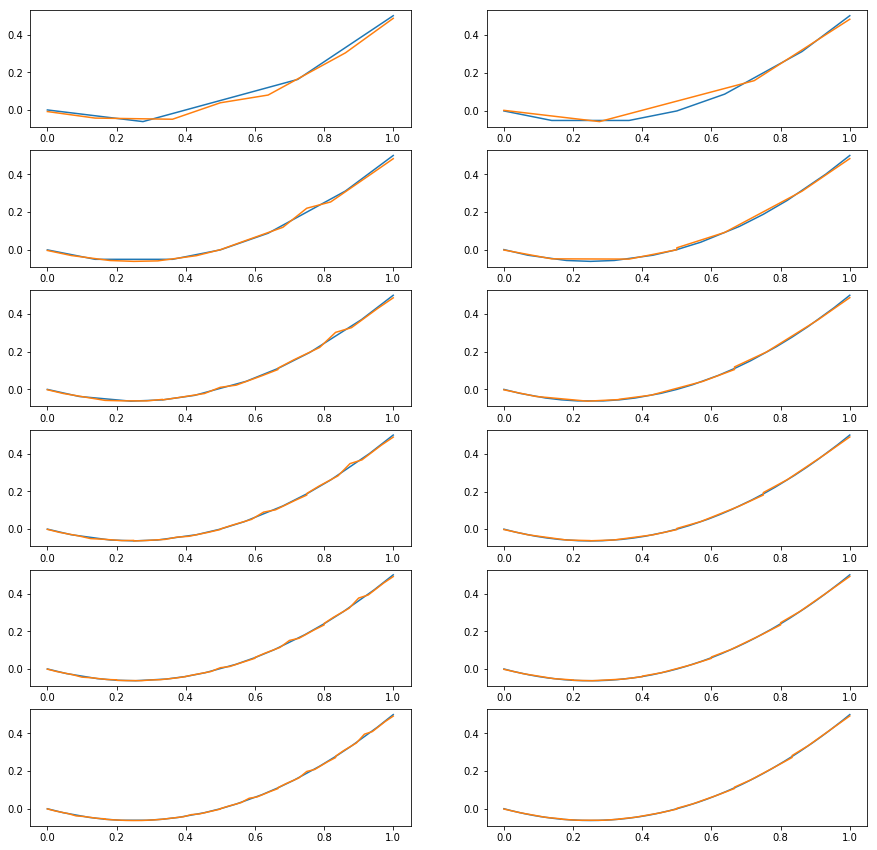

In [27]:
eps_l, eps_r = convergence_test(I_lr=I_lr,
                                I_rl=I_rl,
                                p_l=opt_solve.points[0],
                                p_r=opt_solve.points[1],
                                init_size=(0,1),
                                tr_f=tr_f,
                                weights=[np.array(strict_solve.W_l), np.array(strict_solve.W_r)],
                                div_lim=7)

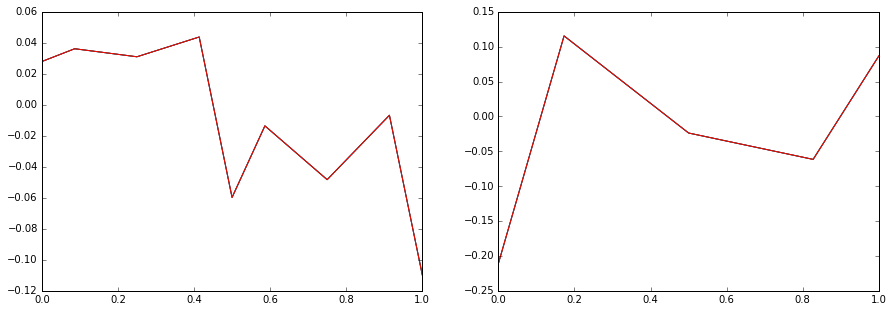

In [35]:
explosion_test(I_lr=I_lr,
               I_rl=I_rl,
               p_l=opt_solve.points[0],
               p_r=opt_solve.points[1],
               tr_f=tr_f,
               reps=3)

In [ ]:
plt.semilogy(range(len(eps_l)), eps_l)
plt.semilogy(range(len(eps_r)), eps_r)
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-np.linspace(0, len(eps_r))))
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-2*np.linspace(0, len(eps_r))))

In [25]:
np.linalg.eigvals(np.dot(I_lr, I_rl))

array([  8.39941979e-01,   9.19593217e-01,   9.99413660e-01,
         1.00000000e+00,   5.68140708e-18,   4.42047189e-17,
        -1.46243303e-16])

In [14]:
I_lr

array([[ 1.22829849,  0.48464847, -0.25684608, -0.45610087],
       [ 0.23913821,  0.65966867,  0.1235421 , -0.02234897],
       [-0.1275535 ,  1.03266901,  0.15410032, -0.05921584],
       [-0.03430599,  1.34046152,  0.11031793, -0.41647347],
       [ 0.08818493, -0.06115703,  0.97521681, -0.00224471],
       [ 0.04581709, -0.324008  ,  0.58342807,  0.69476284],
       [-0.38762016,  0.29856527,  0.85477372,  0.23428118]])

In [15]:
I_rl

array([[ 0.61414924,  0.59784553, -0.31888374, -0.03430599,  0.22046232,
         0.11454272, -0.19381008],
       [ 0.04846485,  0.32983433,  0.51633451,  0.2680923 , -0.03057852,
        -0.162004  ,  0.02985653],
       [-0.02568461,  0.06177105,  0.07705016,  0.02206359,  0.48760841,
         0.29171404,  0.08547737],
       [-0.22805044, -0.05587244, -0.14803959, -0.41647347, -0.00561177,
         1.73690711,  0.11714059]])

In [ ]:
np.dot(I_lr, c2p.get_weights()[0]).sum()

In [ ]:
c2p.get_weights()[0]

In [ ]:
np.dot(I_rl, c2p.get_weights()[1]).sum()

In [ ]:
np.dot(np.dot(c2p.get_diag_weights()[1], I_lr), np.linalg.inv(c2p.get_diag_weights()[0]))

In [ ]:
I_rl.T